In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 1) Load data and Overview

In [2]:
df = pd.read_csv('../data/book600k-700k.csv')

In [3]:
df.size

1047964

In [4]:
df.describe()

,Id,Rating,PublishYear,PublishMonth,PublishDay,CountsOfReview,pagesNumber
count,55156.000000,55156.000000,55156.000000,55156.000000,55156.000000,55156.000000,55156.000000
mean,649584.636232,3.356937,1999.148687,9.654942,6.283287,9.809014,269.561516
std,28919.657296,1.375865,77.257432,10.370721,3.635976,110.033350,303.660011
min,600000.000000,0.000000,1852.000000,1.000000,1.000000,0.000000,0.000000
25%,624453.500000,3.330000,1995.000000,1.000000,3.000000,0.000000,149.000000
50%,649387.500000,3.810000,2001.000000,4.000000,6.000000,1.000000,240.000000
75%,674523.750000,4.090000,2005.000000,18.000000,9.000000,4.000000,336.000000
max,699999.000000,5.000000,20040.000000,31.000000,12.000000,20903.000000,37000.000000


In [5]:
df.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description
0,600000,"Lessons Learned (Great Chefs, #2)",Nora Roberts,037351025X,3.74,1993,15,2,Silhouette,5:947,4:1016,3:1061,2:287,1:63,total:3374,86,eng,250,LESSONS LEARNED...<br /><br />Coordinating the...
1,600001,Walking by Faith: Lessons Learned in the Dark,Jennifer Rothschild,0633099325,4.27,2003,1,1,Lifeway Church Resources,5:367,4:246,3:109,2:22,1:5,total:749,7,NaN,112,"At the age of fifteen, Jennifer Rothschild con..."
2,600003,Better Health in Africa: Experience and Lesson...,World Bank Group,0821328174,5.00,1994,1,1,World Bank Publications,5:1,4:0,3:0,2:0,1:0,total:1,1,NaN,240,NaN
3,600004,"The Blended Learning Book: Best Practices, Pro...",Josh Bersin,0787972967,4.10,2004,1,10,Pfeiffer,5:8,4:6,3:6,2:0,1:0,total:20,3,NaN,319,<i>The Blended Learning Book</i> is your user'...
4,600005,Lessons Learned: Successes Achieved: Be Prepar...,Robert G. Gillio,0595417566,3.00,2006,30,11,iUniverse,5:0,4:0,3:1,2:0,1:0,total:1,0,NaN,168,"""<b>Lessons Learned: Successes Achieved</b>"" w..."


In [6]:
df.dtypes

Id                   int64
Name                object
Authors             object
ISBN                object
Rating             float64
PublishYear          int64
PublishMonth         int64
PublishDay           int64
Publisher           object
RatingDist5         object
RatingDist4         object
RatingDist3         object
RatingDist2         object
RatingDist1         object
RatingDistTotal     object
CountsOfReview       int64
Language            object
pagesNumber          int64
Description         object
dtype: object

# 2) Check for Duplications

- There are no fully duplicated rows

In [7]:
df.duplicated(keep=False).sum()

0

# 3) Check & Address NaN

In [8]:
df.isna().sum()

Id                     0
Name                   0
Authors                0
ISBN                 135
Rating                 0
PublishYear            0
PublishMonth           0
PublishDay             0
Publisher            483
RatingDist5            0
RatingDist4            0
RatingDist3            0
RatingDist2            0
RatingDist1            0
RatingDistTotal        0
CountsOfReview         0
Language           46106
pagesNumber            0
Description         8015
dtype: int64

## Publisher:

- If publisher is NaN, it's usually classics or religious (e.g. the Bible, or Plato's Republic)

In [9]:
df[df['Publisher'].isna()]['Name'].head(10)

443                                   Madonna Nudes 1979
498    The Jefferson Bible: The Life and Morals of Je...
605                            The Book of Common Prayer
620    Developing Leaders : Research and Applications...
783    Black Firsts: 2,000 Years of Extraordinary Ach...
830    Guide to Business Planning (The Economist Series)
865                               Blast (Med Center, #4)
872                        Revenge (Nightmare Hall, #26)
878                       Captives (Nightmare Hall, #25)
879                      Last Date (Nightmare Hall, #11)
Name: Name, dtype: object

- Therefore, we have decided to encode NaN Publisher values as "Unknown"

In [10]:
print(df['Publisher'].isna().sum().astype(str) + ' NaN values replaced by "Unknown"')
df['Publisher'] = df['Publisher'].fillna("Unknown")

483 NaN values replaced by "Unknown"


## Language:



- The majority of the titles of the dataset are in English.

In [11]:
df['Language'].value_counts().head(10)

eng      7104
en-US     948
en-GB     313
fre       295
spa       162
ger       120
jpn        19
ita         8
mul         8
per         8
Name: Language, dtype: int64

- We have applied a heuristic tool with the most popular English stopwords to check if the Name (Title) of books with NaN values for Language contained them. The vast majority did.

In [12]:
import spacy
from spacy.lang.en import STOP_WORDS

eng_stop_words = spacy.lang.en.STOP_WORDS
nan_language_books = df[df['Language'].isna()]
eng_counter = 0

for name in nan_language_books['Name']:
    if any(word in name for word in eng_stop_words):
        eng_counter +=1
print(f'From  {len(nan_language_books)} with NaN values for Language, {eng_counter} contained English stopwords.')

From  46106 with NaN values for Language, 45714 contained English stopwords.


- With the two considerations above, we have decided to encode NaN "Language" values as "eng"

In [13]:
print(df['Language'].isna().sum().astype(str) + ' NaN values replaced by "eng"')
df['Language'] = df['Language'].fillna('eng')

46106 NaN values replaced by "eng"


- After checking unique values for "Language", we have also decided to encode all variations of English as "eng"

In [14]:
df['Language'].unique()

array(['eng', 'en-US', 'en-GB', 'spa', 'ger', 'grc', 'heb', 'por', 'fre',
       'hun', 'mul', 'rus', 'nl', 'jpn', 'ita', 'lat', 'zho', 'fin',
       'kor', 'guj', 'sco', 'en-CA', 'swe', 'tur', 'chp', 'raj', 'urd',
       'ara', 'tha', 'msa', 'per', 'frs', 'gle', 'hin'], dtype=object)

In [15]:
language_mask = df['Language'].str.startswith('en-')
english_varieties = df.loc[language_mask, 'Language']
print(english_varieties.count().astype(str) + ' values standardised as "eng"')
english_varieties = 'eng'

1265 values standardised as "eng"


- To simplify the scope of this project, we will drop all entries that are not in English

In [16]:
print(df['Language'][df.Language != 'eng'].count().astype(str) + ' non-English books removed"')
df = df.drop(df[df.Language != 'eng'].index)

1946 non-English books removed"


## ISBN

- This column is not relevant for the analysis, so we have decided to drop it.

In [17]:
df = df.drop(columns='ISBN')

## Descriptions

In [18]:
# TODO - What do I do with empty descriptions?

# 3) Check dates and replace by datetime format

## Months & Days
- This data is irrelevant for our analysis, so we will drop both columns.

In [19]:
df = df.drop(columns=['PublishMonth', 'PublishDay'])

## Year

- Remove all rows with year before the minimum of timestamp (1677)

In [20]:
print(f"Books before {pd.Timestamp.min.year} dropped: {(df['PublishYear'] <= pd.Timestamp.min.year).sum()}")

Books before 1677 dropped: 0


In [21]:
df = df.drop(df[df['PublishYear'] <= pd.Timestamp.min.year].index)

- Remove all rows with year after the current (probably wrong data)

In [22]:
from datetime import date
print(f"Books after {date.today().year} dropped: {(df['PublishYear'] >= date.today().year).sum()}")

Books after 2022 dropped: 1


In [23]:
df = df.drop(df[df['PublishYear'] >= date.today().year].index)

- Convert year to datetime format

In [24]:
df['PublishYear'] = pd.to_datetime(df['PublishYear'], format='%Y')

# 4) Cleaning RatingDistTotal

- Remove "total:" from column and convert to int.

In [25]:
df['RatingDistTotal'] = df['RatingDistTotal'].str.replace("total:", "").astype(int)

# 5) Questions about the data

- Who are the top 5 most rated authors?

In [26]:
df.groupby('Authors')['RatingDistTotal'].sum().sort_values(ascending = False).head()

Authors
J.K. Rowling                   7611534
J.R.R. Tolkien                 7076804
Mary Wollstonecraft Shelley    6733827
William Shakespeare            6687664
George Orwell                  5605107
Name: RatingDistTotal, dtype: int64

- How many different publishers are there?

In [27]:
df['Publisher'].nunique()

8214

- Who are the top 5 publishers (most published books)?

In [28]:
df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head()

Publisher
Routledge                       1008
Oxford University Press, USA     808
Cambridge University Press       776
Springer                         502
Unknown                          444
dtype: int64

- Which are the top 5 longest books in the dataset?

In [29]:
df[['pagesNumber', 'Name']].sort_values(by=['pagesNumber'], ascending=False).head()

,pagesNumber,Name
14502,31134,2004 Complete Guide to the Federal Bureau of I...
23551,9998,Richard Wright: A Collection of Critical Essays
6120,9998,Abnormal Psychology
1902,9998,Computer Graphics: Principles and Practice
46472,9928,State Limited Liability Company and Partnershi...


- What is the average rating of all books?

In [30]:
df['Rating'].mean()

3.3409840440526977

- What is the mean rating of all books?

In [31]:
df['Rating'].median()

3.81

- Does publisher explain the rating?

[Text(0, 0, 'W. W. Norton  Company'),
 Text(1, 0, 'Thomas Nelson'),
 Text(2, 0, 'Dover Publications'),
 Text(3, 0, 'Taschen'),
 Text(4, 0, 'Bantam'),
 Text(5, 0, 'Vintage'),
 Text(6, 0, 'Penguin Books'),
 Text(7, 0, 'University of California Press'),
 Text(8, 0, 'Ballantine Books'),
 Text(9, 0, 'Signet'),
 Text(10, 0, 'Yale University Press'),
 Text(11, 0, 'University of Chicago Press'),
 Text(12, 0, 'HarperCollins Publishers'),
 Text(13, 0, 'Kessinger Publishing'),
 Text(14, 0, 'Scholastic'),
 Text(15, 0, 'Princeton University Press'),
 Text(16, 0, 'Oxford University Press, USA'),
 Text(17, 0, 'Wiley'),
 Text(18, 0, 'Cambridge University Press'),
 Text(19, 0, "St. Martin's Press"),
 Text(20, 0, 'State University of New York Press'),
 Text(21, 0, 'Unknown'),
 Text(22, 0, 'Prentice Hall'),
 Text(23, 0, 'Saddleback Educational Publishing, Inc.'),
 Text(24, 0, 'Routledge'),
 Text(25, 0, 'John Wiley & Sons'),
 Text(26, 0, 'iUniverse'),
 Text(27, 0, 'CRC Press'),
 Text(28, 0, 'Authorhouse')

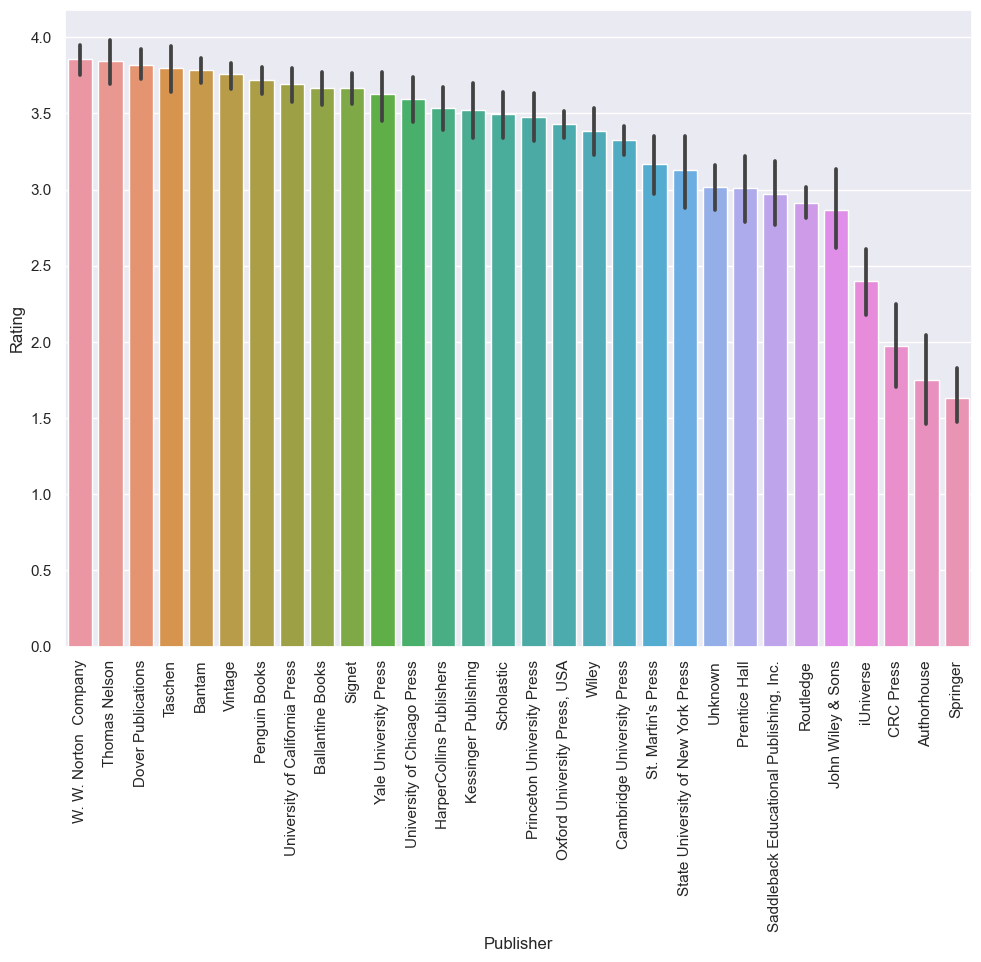

In [32]:
top_publishers = df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head(30)
books_from_top_publishers = df[df['Publisher'].isin(top_publishers.index)]
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').Rating.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='Rating',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does publisher explain amount of reviews?

[Text(0, 0, 'Vintage'),
 Text(1, 0, 'Ballantine Books'),
 Text(2, 0, 'Bantam'),
 Text(3, 0, 'Signet'),
 Text(4, 0, 'Penguin Books'),
 Text(5, 0, "St. Martin's Press"),
 Text(6, 0, 'W. W. Norton  Company'),
 Text(7, 0, 'Thomas Nelson'),
 Text(8, 0, 'Scholastic'),
 Text(9, 0, 'Dover Publications'),
 Text(10, 0, 'John Wiley & Sons'),
 Text(11, 0, 'HarperCollins Publishers'),
 Text(12, 0, 'Unknown'),
 Text(13, 0, 'University of Chicago Press'),
 Text(14, 0, 'Princeton University Press'),
 Text(15, 0, 'Oxford University Press, USA'),
 Text(16, 0, 'University of California Press'),
 Text(17, 0, 'Wiley'),
 Text(18, 0, 'Yale University Press'),
 Text(19, 0, 'Taschen'),
 Text(20, 0, 'Kessinger Publishing'),
 Text(21, 0, 'Cambridge University Press'),
 Text(22, 0, 'Saddleback Educational Publishing, Inc.'),
 Text(23, 0, 'Prentice Hall'),
 Text(24, 0, 'Routledge'),
 Text(25, 0, 'State University of New York Press'),
 Text(26, 0, 'iUniverse'),
 Text(27, 0, 'Authorhouse'),
 Text(28, 0, 'CRC Press')

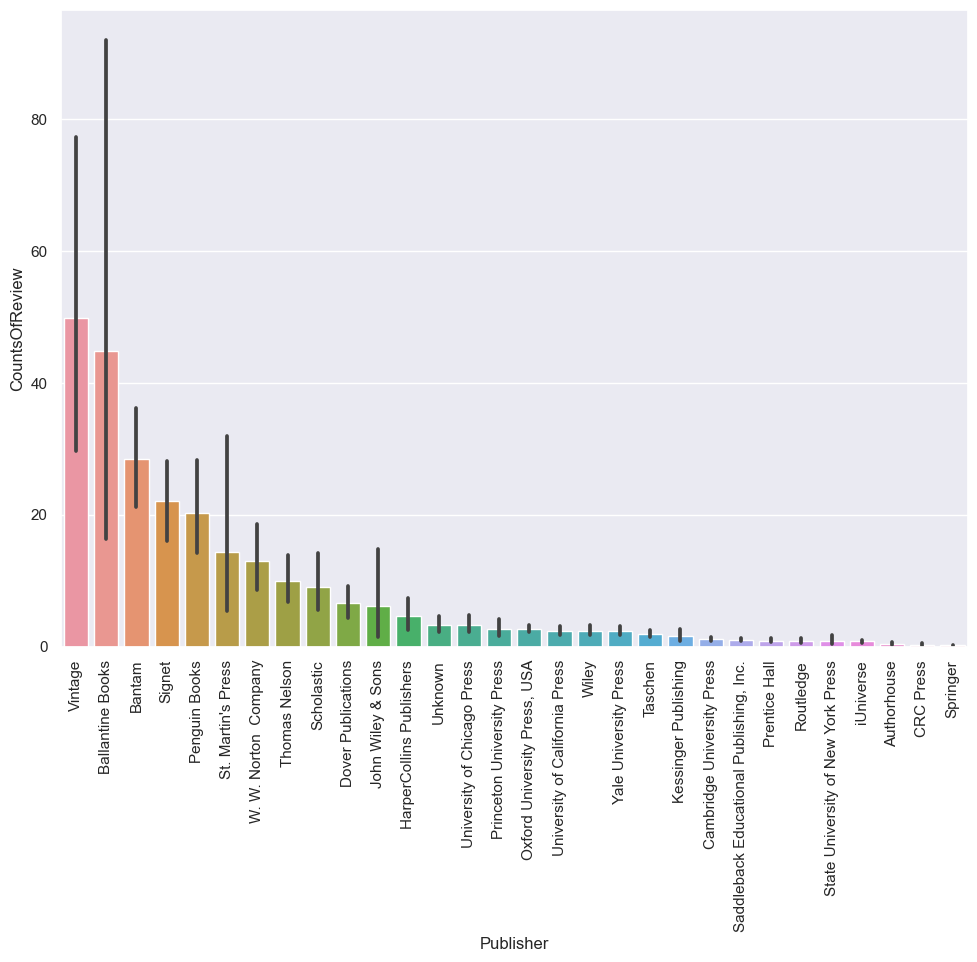

In [33]:
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').CountsOfReview.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='CountsOfReview',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does the number of pages impact the amount of reviews?

[(0.0, 4000.0)]

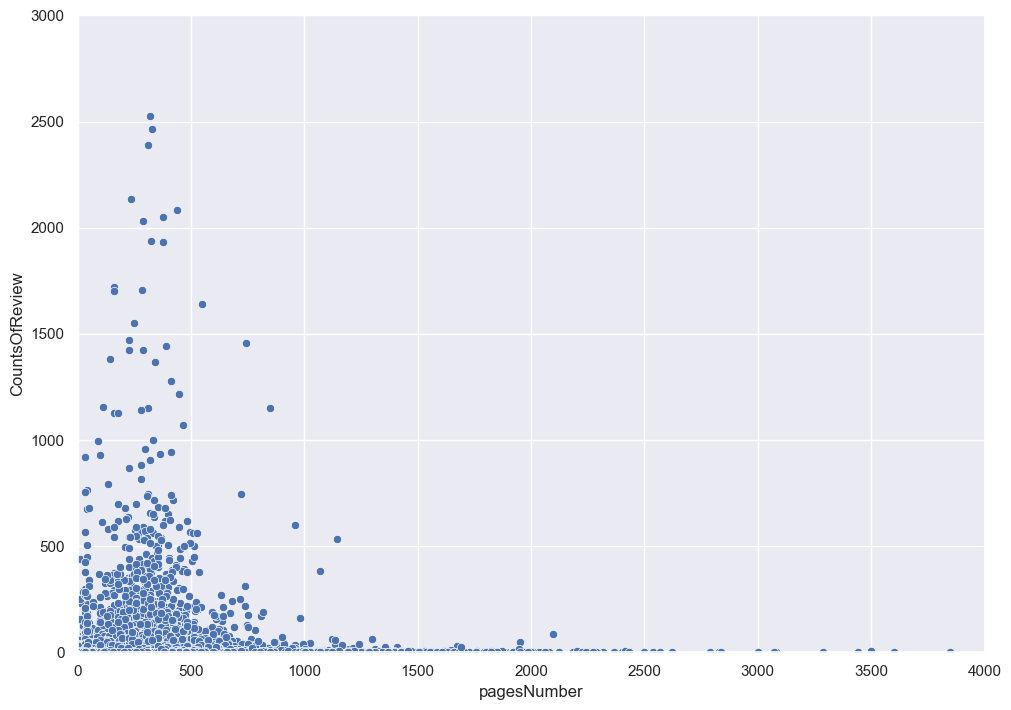

In [34]:
g = sns.scatterplot(data=df,
                x='pagesNumber',
                y='CountsOfReview')
g.set(ylim=(0, 3000))
g.set(xlim=(0, 4000))

- Does the number of reviews impact the rating?

[(0.0, 3000.0)]

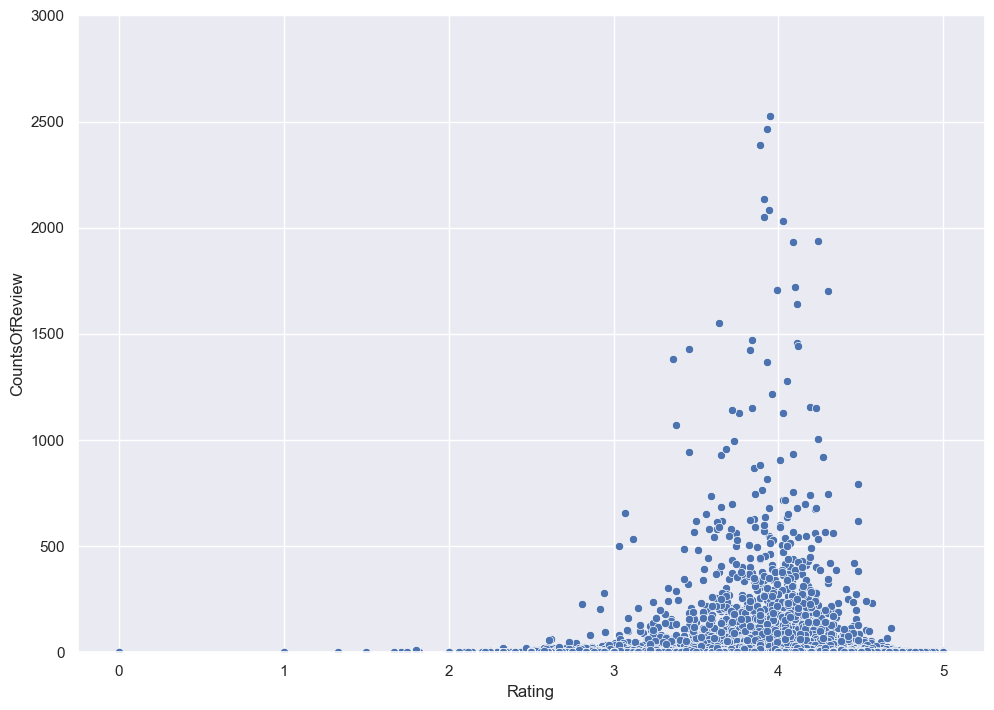

In [35]:
g = sns.scatterplot(data=df,
                x='Rating',
                y='CountsOfReview')
g.set(ylim=(0, 3000))

- Is there a relationship between time since publication and amount of reviews?

[(1900, 21330.05)]

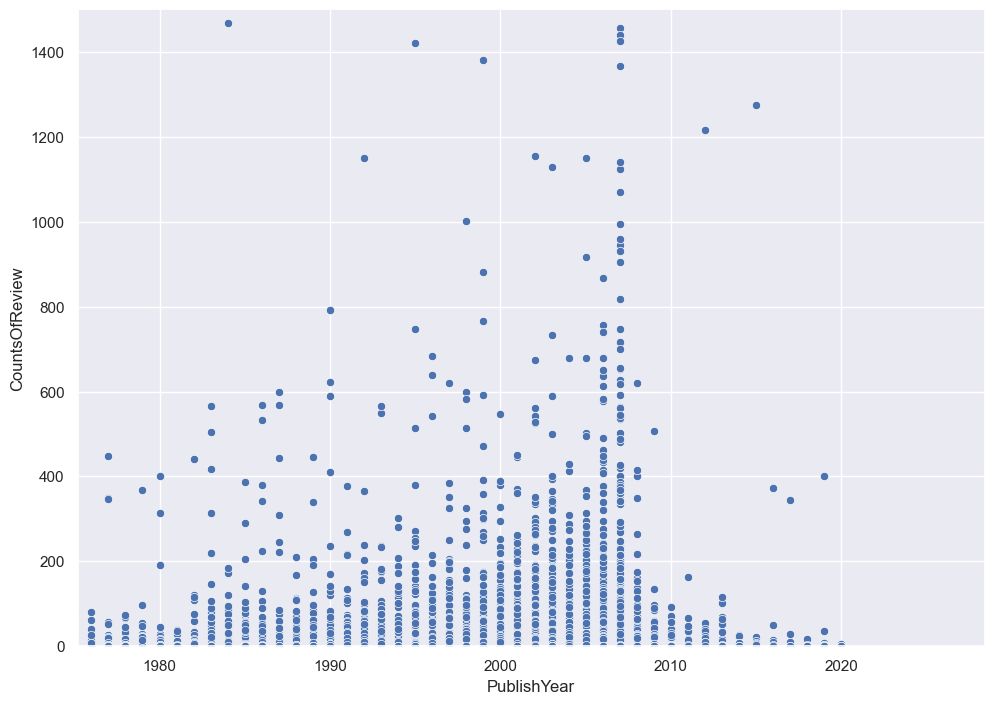

In [36]:
g = sns.scatterplot(data=df,
                x='PublishYear',
                y='CountsOfReview')
g.set(ylim=(0, 1500))
g.set(xlim=(1900, None))



# NLP related analysis
- Most common words in titles (tokenization + countvectorizer)
- Which are the rarest words (tokenization + countevectorizer)